In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Load and Overview

In [38]:
# 1.Load data and check
df = sns.load_dataset('planets')

In [39]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [41]:
df.nunique()

method             10
number              7
orbital_period    988
mass              381
distance          552
year               23
dtype: int64

### Task 2: Mass Binning

In [42]:
# 2. divide mass into quintiles labeled
df['mass_bin'] = pd.qcut(df['mass'], q=5 , labels=['very low', 'low', 'medium', 'high', 'very high'])

In [43]:
df

,method,number,orbital_period,mass,distance,year,mass_bin
0,Radial Velocity,1,269.300000,7.10,77.40,2006,very high
1,Radial Velocity,1,874.774000,2.21,56.95,2008,high
2,Radial Velocity,1,763.000000,2.60,19.84,2011,high
3,Radial Velocity,1,326.030000,19.40,110.62,2007,very high
4,Radial Velocity,1,516.220000,10.50,119.47,2009,very high
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,NaN
1031,Transit,1,2.615864,NaN,148.00,2007,NaN
1032,Transit,1,3.191524,NaN,174.00,2007,NaN
1033,Transit,1,4.125083,NaN,293.00,2008,NaN


In [44]:
df.value_counts('mass_bin')

mass_bin
very low     103
medium       103
very high    103
low          102
high         102
Name: count, dtype: int64

### Task 3: Distance and Mass Grouping

In [45]:
# 3. group data by distance and mass_bin, then caculate the median orbital period and mass for each group
grouped_df = df.groupby(['distance', 'mass_bin'], observed=False).agg({
    'orbital_period': 'mean',
    'mass': 'mean'
}).reset_index()
grouped_df

,distance,mass_bin,orbital_period,mass
0,1.35,very low,3.2357,0.0036
1,1.35,low,NaN,NaN
2,1.35,medium,NaN,NaN
3,1.35,high,NaN,NaN
4,1.35,very high,NaN,NaN
...,...,...,...,...
2755,8500.00,very low,NaN,NaN
2756,8500.00,low,NaN,NaN
2757,8500.00,medium,NaN,NaN
2758,8500.00,high,NaN,NaN


### Task 4: Distance Ratio Calculation

In [46]:
# 4. Create a new column 'distance_ratio' by dividing each distance by the maximum distance
df['distance_ratio'] = df['distance'] / df['distance'].max()

In [47]:
df

,method,number,orbital_period,mass,distance,year,mass_bin,distance_ratio
0,Radial Velocity,1,269.300000,7.10,77.40,2006,very high,0.009106
1,Radial Velocity,1,874.774000,2.21,56.95,2008,high,0.006700
2,Radial Velocity,1,763.000000,2.60,19.84,2011,high,0.002334
3,Radial Velocity,1,326.030000,19.40,110.62,2007,very high,0.013014
4,Radial Velocity,1,516.220000,10.50,119.47,2009,very high,0.014055
...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,NaN,0.020235
1031,Transit,1,2.615864,NaN,148.00,2007,NaN,0.017412
1032,Transit,1,3.191524,NaN,174.00,2007,NaN,0.020471
1033,Transit,1,4.125083,NaN,293.00,2008,NaN,0.034471


### Task 5: Log Transformation

In [48]:
# Apply logarithmic transformation to orbital_period and mass
df['log_orbital_period'] = np.log(df['orbital_period'])
df['log_mass'] = np.log(df['mass'])
# Replace infinite and null values with NaN
df['log_orbital_period'] = df['log_orbital_period'].replace([np.inf, -np.inf], np.nan)
df['log_mass'] = df['log_mass'].replace([np.inf, -np.inf], np.nan)

In [49]:
df

,method,number,orbital_period,mass,distance,year,mass_bin,distance_ratio,log_orbital_period,log_mass
0,Radial Velocity,1,269.300000,7.10,77.40,2006,very high,0.009106,5.595826,1.960095
1,Radial Velocity,1,874.774000,2.21,56.95,2008,high,0.006700,6.773966,0.792993
2,Radial Velocity,1,763.000000,2.60,19.84,2011,high,0.002334,6.637258,0.955511
3,Radial Velocity,1,326.030000,19.40,110.62,2007,very high,0.013014,5.786989,2.965273
4,Radial Velocity,1,516.220000,10.50,119.47,2009,very high,0.014055,6.246533,2.351375
...,...,...,...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,NaN,0.020235,1.371563,NaN
1031,Transit,1,2.615864,NaN,148.00,2007,NaN,0.017412,0.961594,NaN
1032,Transit,1,3.191524,NaN,174.00,2007,NaN,0.020471,1.160499,NaN
1033,Transit,1,4.125083,NaN,293.00,2008,NaN,0.034471,1.417086,NaN


### Task 6: Boxplot of Mass by Detection Method

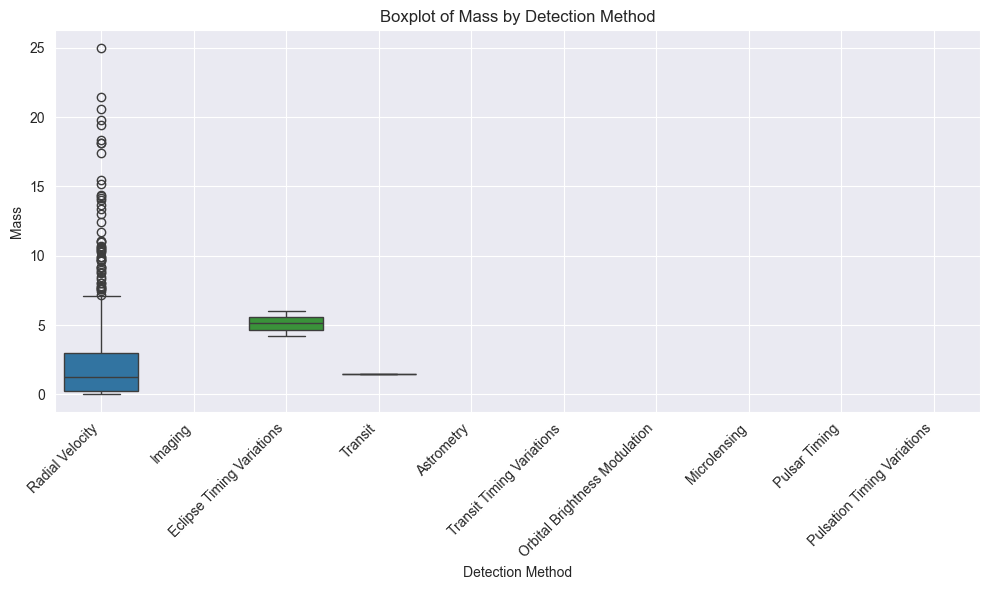

In [62]:
# Use a boxplot to compare mass distribution across different method categories
plt.figure(figsize=(10,6))
sns.boxplot(x='method',y='mass',data=df, hue='method')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Detection Method')
plt.ylabel('Mass')
plt.title('Boxplot of Mass by Detection Method')
plt.grid(True)
plt.tight_layout()
plt.show();

''' Comments:
+ Radial Velocity Dominance: The boxplot for the Radial Velocity method is the most prominent, indicating that this method has been used to detect a large number of exoplanets, particularly those with lower masses.
+ Transit Method: The Transit method also shows a significant number of detections, with a slightly higher median mass compared to Radial Velocity.
+ Other Methods: The other detection methods, such as Imaging, Eclipse Timing Variations, Astrometry, Transit Timing Variations, Orbital Brightness Modulation, Microlensing, Pulsar Timing, and Pulsation Timing Variations, have fewer detections and often show a wider range of masses.

'''

### Task 7: Density 

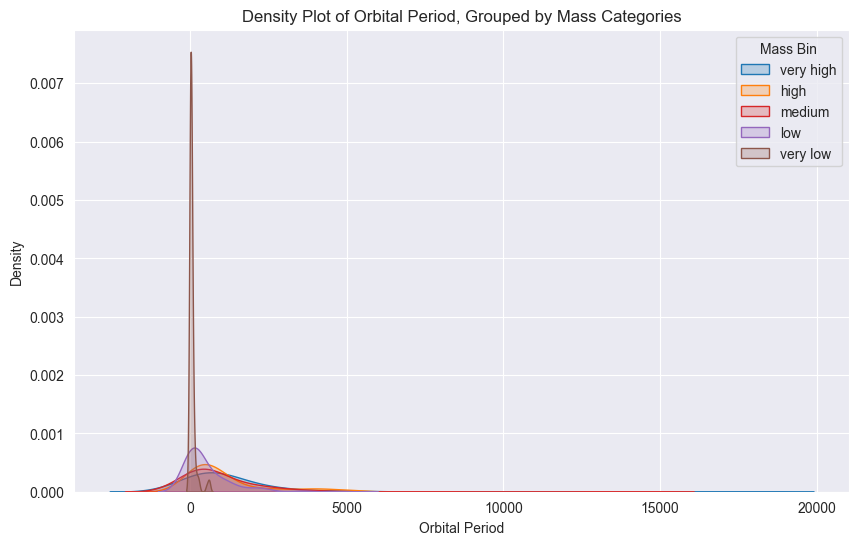

In [51]:
# Create density plots for orbital_period, grouped by mass_bin, to observe differences across mass categories
plt.figure(figsize=(10,6))

# Use a loop to create a density plot for each mass_bin category
for category in df['mass_bin'].unique():
    subset = df[df['mass_bin'] == category]
    sns.kdeplot(subset['orbital_period'], label=category, fill=True)
    
plt.xlabel('Orbital Period')
plt.ylabel("Density")
plt.title("Density Plot of Orbital Period, Grouped by Mass Categories")
plt.legend(title="Mass Bin")
plt.show()

''' Comments:

Peak at Short Orbital Periods: 

There's a prominent peak in the density plot around the 0-5000 day range for all mass categories. This suggests that a significant number of exoplanets, regardless of their mass, tend to have short orbital periods.

Mass-Period Relationship: While the overall trend shows a peak at short periods, there are subtle differences between the mass categories:
+ Very Low Mass: This category has a slightly broader distribution, extending to longer orbital periods compared to the other categories.

+ Low Mass: This category also shows a broader distribution, but it's more concentrated towards shorter periods.

+ Medium Mass: This category has a more concentrated distribution around the peak, with fewer exoplanets having very short or very long orbital periods.

+ High Mass: This category has a similar distribution to the medium mass category, with a concentration around the peak and fewer exoplanets at the extremes.

+ Very High Mass: This category has a distribution similar to the high mass category, with a concentration around the peak and fewer exoplanets at the extremes.
'''

### Task 8: Top 10 Closest Planets

In [61]:
# Identify the 10 planets with the shortest distance values and display their mass, orbital_period and method
closest_plannets = df.nsmallest(10, 'distance')[['mass', 'orbital_period', 'method']].reset_index(drop=True)
closest_plannets

,mass,orbital_period,method
0,0.00360,3.23570,Radial Velocity
1,1.55000,2502.00000,Radial Velocity
2,0.03500,4.69380,Radial Velocity
3,2.27560,61.11660,Radial Velocity
4,0.71420,30.08810,Radial Velocity
5,0.02100,1.93778,Radial Velocity
6,0.04600,124.26000,Radial Velocity
7,0.64000,3416.00000,Radial Velocity
8,0.00850,18.31500,Radial Velocity
9,0.00755,40.11400,Radial Velocity


### Task 9: Outlier Detection for Mass

In [57]:
# Identify planets with mass values in the top 5% and display relevant features such as distance, orbital_period and method
mass_threshold = df['mass'].quantile(0.95)
top_mass_planets = df[df['mass'] >= mass_threshold][['distance', 'orbital_period', 'method']].reset_index(drop=True)

top_mass_planets

,distance,orbital_period,method
0,110.62,326.030000,Radial Velocity
1,92.51,305.500000,Radial Velocity
2,NaN,714.300000,Radial Velocity
3,NaN,379.630000,Radial Velocity
4,NaN,621.990000,Radial Velocity
5,214.00,428.500000,Radial Velocity
6,38.26,1634.000000,Radial Velocity
7,300.30,471.600000,Radial Velocity
8,50.18,465.100000,Radial Velocity
9,31.79,528.070000,Radial Velocity


### Task 10: Heatmap of Detection Method Frequencies by Mass Bin

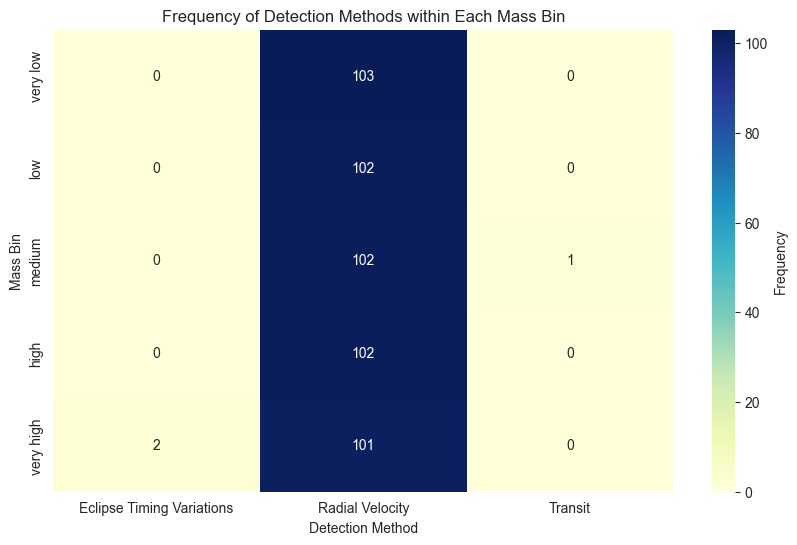

In [56]:
    # Create a heatmap to show the frequency of each detection method within each mass_bin
method_count = pd.crosstab(df['mass_bin'], df['method'])

plt.figure(figsize=(10,6))
sns.heatmap(method_count, annot=True,fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequency'})

plt.xlabel('Detection Method')
plt.ylabel('Mass Bin')
plt.title("Frequency of Detection Methods within Each Mass Bin")
plt.show()

''' Comments:

+ The Radial Velocity method is the most commonly used method for detecting planets in all mass ranges. This shows that the method is very effective in detecting planets of different masses.

+ The Transit method has a lower detection frequency than the radial velocity method. This may be because the method is only effective when the planet's orbit passes in front of the host star, creating a small slight decrease in the star's brightness.

+ Eclipse Timing Variations has a very low detection frequency and is only used to detect planets in very large mass ranges. The method is based on measuring the small variation in the time between eclipses of a binary star system.

 
'''
